In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # note this new package! used a lot in online examples
import pandas as pd
import re

In [62]:
#Since the ds has some text/string values , in this cell we have cleaned the text/string values.
#techniques for cleaning data and preparing it for analysis
# Load the CSV file
#datset from kaggle
df_air = pd.read_csv('air_pollutionds.csv')


columns_to_clean = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Iterate over each specified column to clean
for column in columns_to_clean:
    # Replace non-numeric entries with NaN
    df_air[column] = pd.to_numeric(df_air[column], errors='coerce')

# Drop rows with NaN values in the specified columns only
df_air.dropna(subset=columns_to_clean, inplace=True)

# Ensure columns are converted to float type
df_air[columns_to_clean] = df_air[columns_to_clean].astype(float)

# Check the mean of numeric columns
mean_values = df_air[columns_to_clean].mean()

# Print the cleaned DataFrame with all columns (both cleaned and non-cleaned)
print(df_air)

# Mean values for each year
print("\nMean values of every Year:")
print(mean_values)

# Median values for each year
Median = df_air[columns_to_clean].median()
print("\nMedian values of every Year:")
print(Median)


# Standard Deviation for each year
std_dev = df_air[columns_to_clean].std(axis=0)
print("\nStandard Deviation for every Year:")
print(std_dev)


# Standard Deviation for each year

skewness = df_air[columns_to_clean].skew()

print("\nSkewness for each year:")
print(skewness)


kurtosis = df_air[columns_to_clean].kurtosis()

print("\nKurtosis for each year:")
print(kurtosis)


correlation_matrix = df_air[columns_to_clean].corr()

# Display the correlation matrix
print("\nCorrelation for each year:")
print(correlation_matrix)


                    city      country  2017  2018  2019  2020  2021  2022  \
0                  Kabul  Afghanistan   0.0  61.8  58.8  46.5  37.5  17.1   
1                 Tirana      Albania   0.0   0.0   0.0  16.0  12.5  14.5   
2                Algiers      Algeria   0.0   0.0  21.2  20.2  20.0  17.8   
3                 Ordino      Andorra   0.0   0.0   0.0   7.4   7.3   5.4   
4                 Luanda       Angola   0.0   0.0  15.9  13.0  11.0   8.8   
...                  ...          ...   ...   ...   ...   ...   ...   ...   
6980  Thanh Pho Lang Son      Vietnam   0.0   0.0   0.0   0.0  36.8  14.6   
6981             Thu Duc      Vietnam   0.0   0.0   0.0   0.0  20.1  24.5   
6982            Tra Vinh      Vietnam   0.0   0.0   0.0   0.0   6.2   5.5   
6983          Trang Bang      Vietnam   0.0   0.0   0.0   0.0   0.0  12.9   
6984              Lusaka       Zambia   0.0   0.0   0.0   0.0  24.6  24.6   

      2023  
0     18.1  
1     14.4  
2     17.4  
3      5.3  
4      8.7

In [63]:
df_air.describe()

,2017,2018,2019,2020,2021,2022,2023
count,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000
mean,5.443093,5.714464,7.638271,7.875470,12.525376,12.797813,12.784554
std,12.608090,12.298595,11.691586,11.101636,11.489337,10.812310,10.858810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000
25%,0.000000,0.000000,0.000000,0.000000,6.900000,7.000000,7.000000
50%,0.000000,0.000000,4.600000,6.000000,9.800000,9.400000,9.300000
75%,7.800000,8.500000,10.800000,10.900000,14.700000,14.200000,14.200000
max,145.600000,135.800000,110.200000,110.200000,175.900000,97.400000,97.400000


In [64]:
df_air.columns

Index(['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [65]:
group17 = df_air.groupby('country')['2017'].sum()
group18 = df_air.groupby('country')['2018'].sum()
group19 = df_air.groupby('country')['2019'].sum()
group20 = df_air.groupby('country')['2020'].sum()
group21 = df_air.groupby('country')['2021'].sum()
group22 = df_air.groupby('country')['2022'].sum()


In [66]:
year_list = (
    list(df_air['2017']) + 
    list(df_air['2018']) + 
    list(df_air['2019']) + 
    list(df_air['2020']) + 
    list(df_air['2021']) + 
    list(df_air['2022'])
)

# Convert values to int

Total = df_air[['2017', '2018', '2019', '2020', '2021', '2022']].sum(axis=1)


# plt.bar(df_air['country'], Total, color='k', label='Total')

# plt.xlabel('Countries')
# plt.ylabel('Total Values')
# plt.title('Total Yearly Data by Country')
# plt.legend()


In [67]:
#df_air[df_air['country'] == 'Pakistan']
#df_air.mean()

In [68]:
Selected_countries = df_air[df_air['country'].isin(['Pakistan', 'India', 'United Kingdom'])][['2017', '2018', '2019', '2020', '2021' , '2022' , '2023']]

Selected_countries = Selected_countries.apply(pd.to_numeric, errors='coerce')

print(Selected_countries)

       2017   2018  2019  2020  2021  2022  2023
1822    0.0    0.0   0.0   0.0  39.2  42.3  45.7
1823  110.6  104.8  57.2  80.2  73.4  38.2  40.2
1824    0.0   76.1  59.0  49.0  55.1  53.3  53.5
1825    0.0   54.0  48.1  39.8  43.7  52.1  52.1
1826    0.0    0.0   0.0   0.0   0.0   2.7   2.6
...     ...    ...   ...   ...   ...   ...   ...
6956    0.0    0.0   0.0  10.5  11.3  10.0  10.0
6957    0.0    0.0   0.0   0.0  10.5  11.5  11.4
6958    0.0    0.0  10.0   8.3   8.6   9.7   9.6
6959    0.0    0.0   8.0   7.7   8.1   7.9   7.9
6960    9.5    9.8   9.6   7.9   7.0   7.6   7.6

[395 rows x 7 columns]


In [69]:
print(Selected_countries)

       2017   2018  2019  2020  2021  2022  2023
1822    0.0    0.0   0.0   0.0  39.2  42.3  45.7
1823  110.6  104.8  57.2  80.2  73.4  38.2  40.2
1824    0.0   76.1  59.0  49.0  55.1  53.3  53.5
1825    0.0   54.0  48.1  39.8  43.7  52.1  52.1
1826    0.0    0.0   0.0   0.0   0.0   2.7   2.6
...     ...    ...   ...   ...   ...   ...   ...
6956    0.0    0.0   0.0  10.5  11.3  10.0  10.0
6957    0.0    0.0   0.0   0.0  10.5  11.5  11.4
6958    0.0    0.0  10.0   8.3   8.6   9.7   9.6
6959    0.0    0.0   8.0   7.7   8.1   7.9   7.9
6960    9.5    9.8   9.6   7.9   7.0   7.6   7.6

[395 rows x 7 columns]


In [70]:

countries_mean = df_air[df_air['country'].isin(['Pakistan', 'India', 'United Kingdom'])]

# Select the relevant columns
countries_mean = countries_mean[['country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']]

# Convert year columns to float, coercing errors to NaN
countries_mean[['2017', '2018', '2019', '2020', '2021', '2022', '2023']] = countries_mean[['2017', '2018', '2019', '2020', '2021' , '2022' , '2023']].apply(pd.to_numeric, errors='coerce')

# Now, group by 'country' and calculate the mean for the specified columns
mean_values = countries_mean.groupby('country').mean()

# Reset the index for a cleaner DataFrame (optional)
mean_values = mean_values.reset_index()

# Print the mean values
print(mean_values)

          country       2017       2018       2019       2020       2021  \
0           India  11.587624  17.096040  19.649505  22.643069  34.853465   
1        Pakistan  30.128571  45.371429  53.457143  50.900000  71.385714   
2  United Kingdom   2.981183   3.318817   5.522043   4.474194   7.705914   

        2022       2023  
0  43.279703  43.503960  
1  69.257143  70.228571  
2   8.024194   8.037634  


In [71]:
print(mean_values)

          country       2017       2018       2019       2020       2021  \
0           India  11.587624  17.096040  19.649505  22.643069  34.853465   
1        Pakistan  30.128571  45.371429  53.457143  50.900000  71.385714   
2  United Kingdom   2.981183   3.318817   5.522043   4.474194   7.705914   

        2022       2023  
0  43.279703  43.503960  
1  69.257143  70.228571  
2   8.024194   8.037634  


        2017       2018       2019       2020       2021       2022       2023
0  11.587624  17.096040  19.649505  22.643069  34.853465  43.279703  43.503960
1  30.128571  45.371429  53.457143  50.900000  71.385714  69.257143  70.228571
2   2.981183   3.318817   5.522043   4.474194   7.705914   8.024194   8.037634


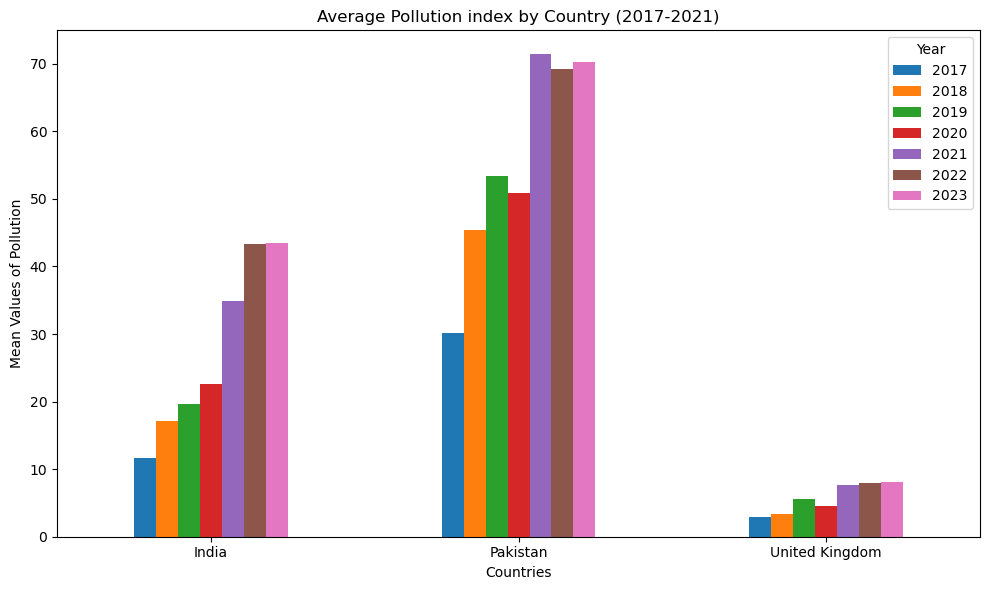

In [72]:
#1. Bar Graph
mean_values.plot(x='country', kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Average Pollution index by Country (2017-2021)')
plt.xlabel('Countries')
plt.ylabel('Mean Values of Pollution')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Year')
plt.tight_layout()  # Adjust layout to make room for labels
print(mean_values[['2017', '2018', '2019', '2020', '2021', '2022', '2023']])


            city         country   2017   2018  2019  2020  2021  2022  2023
1822    Agartala           India    0.0    0.0   0.0   0.0  39.2  42.3  45.7
1823        Agra           India  110.6  104.8  57.2  80.2  73.4  38.2  40.2
1824   Ahmedabad           India    0.0   76.1  59.0  49.0  55.1  53.3  53.5
1825       Ajmer           India    0.0   54.0  48.1  39.8  43.7  52.1  52.1
1826       Aladu           India    0.0    0.0   0.0   0.0   0.0   2.7   2.6
...          ...             ...    ...    ...   ...   ...   ...   ...   ...
6956     Windsor  United Kingdom    0.0    0.0   0.0  10.5  11.3  10.0  10.0
6957  Wood Green  United Kingdom    0.0    0.0   0.0   0.0  10.5  11.5  11.4
6958    Worthing  United Kingdom    0.0    0.0  10.0   8.3   8.6   9.7   9.6
6959     Wrexham  United Kingdom    0.0    0.0   8.0   7.7   8.1   7.9   7.9
6960        York  United Kingdom    9.5    9.8   9.6   7.9   7.0   7.6   7.6

[395 rows x 9 columns]
                     2017       2018       2019     

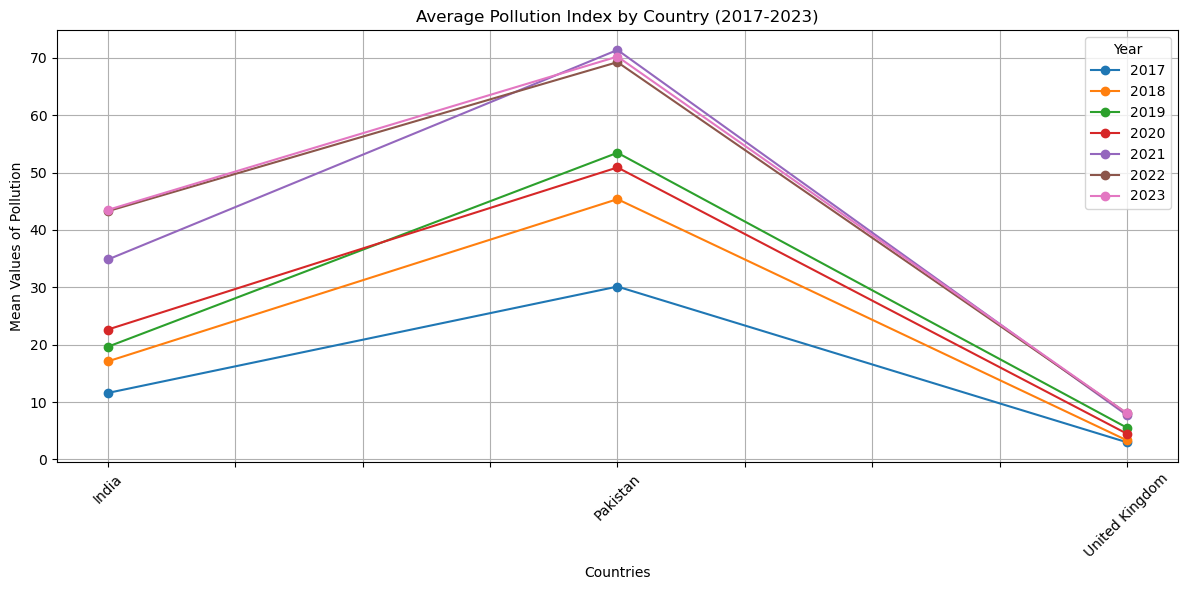

In [73]:
#2. Line graph


# Assuming df_air is already defined and cleaned
# Calculate means for the numeric columns

# Create a DataFrame for the means with countries as index
# Assuming df_air is already defined and cleaned

# Filter for specific countries
specific_countries = df_air[df_air['country'].isin(['Pakistan', 'India', 'United Kingdom'])]
print(specific_countries)

# Group by country and calculate mean for specified years
mean_df = specific_countries[['country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']].groupby('country').mean()
print(mean_df)
# Plotting the line graph
mean_df.plot(kind='line', marker='o', figsize=(12, 6))

# Adding titles and labels
plt.title('Average Pollution Index by Country (2017-2023)')
plt.xlabel('Countries')
plt.ylabel('Mean Values of Pollution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Year')
plt.tight_layout()  # Adjust layout to make room for labels
plt.grid()  # Optional: Add grid for better readability
plt.show()

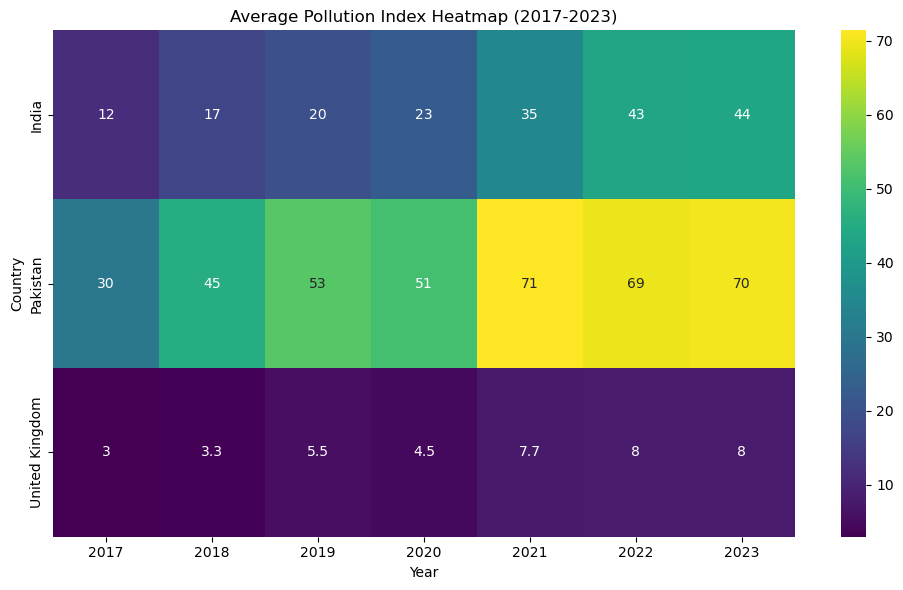

In [74]:
mean_df_reset = mean_df.reset_index()

heatmap_data = mean_df_reset.set_index('country')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar=True)

# Adding titles and labels
plt.title('Average Pollution Index Heatmap (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout() 